# Reconocimiento de dígitos con KNN

Veamos como interactuar con las clases implementadas en el módulo de C++ haciendo una experimentación muy simplificada, y a modo de ejemplo, del método KNN para reconocer digitos

## Compilando el módulo desde C++

Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd ../.. && mkdir build
!cd ../../build/ && rm -rf *
!cd ../../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/facutotaro/.virtualenvs/tp/bin/python (found version "3.8.10") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/facutotaro/machine/metnum_tp2
-- Configuring done
-- Gener

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version

import sys
import os

p = os.path.abspath('../')
sys.path.insert(1, p)

import metnum

/home/facutotaro/machine/metnum_tp2/notebooks/Facu
Python 3.8.10


## Explorando los datos

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd

df_train = pd.read_csv("../../data/train.csv")

df_train = df_train.sample(frac = 1)

X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)


In [4]:
print(len(X))

42000


Es un csv, con columnas por cada pixel

### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

In [5]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 9


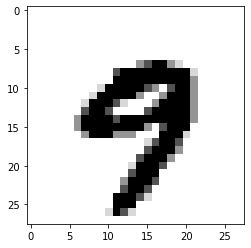

In [6]:
import matplotlib.pyplot as plt

num = 4

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [7]:
df_train["label"].value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [8]:
import csv
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time

# Creo una clase
class attributes: 
    def __init__(self, number, neighbours, percentage, acc, prec, rec, t): 
        self.number = number
        self.neighbours = neighbours
        self.percentage = percentage
        self.acc = acc
        self.prec = prec
        self.rec = rec
        self.time = t
   


def createObject(X_train, y_train,X_val, y_val,p,v,n,lista, t1):
        
        start2 = time.time()
        clf = metnum.KNNClassifier(v)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        finish2 = time.time()
        t2 = finish2-start2
        acc = accuracy_score(y_val, y_pred)
        #print("Accuracy: {}".format(acc))
        prec = precision_score(y_val, y_pred, average='macro')
        #print("Precision: {}".format(prec))
        rec = recall_score(y_val, y_pred, average='macro')
        #print("Recall: {}".format(rec))
        #print("Aber: " + str(t1+t2))
        lista.append(attributes(n,v,p,acc,prec,rec, t1+t2))
        


def experiment(per_b, per_i, nei_b, nei_i):
    print("Comenzando...")
    list = []
    number = 0
    total = 0
    
    
    for v1 in range(per_b,100,per_i):
        for v2 in range(nei_b,100,nei_i):
            total += 1
    for v1 in range(per_b,100,per_i):
        print("Calculando PCA para "+str(v1)+"%")
        start1 = time.time()
        limit = int(v1/100 * X.shape[0])
        X_train, y_train = X[:limit], y[:limit]
        X_val, y_val = X[limit:], y[limit:]
        pca = metnum.PCA(40)
        startp1 = time.time()
        pca.fit(X_train)
        startp2 = time.time()
        X_train = pca.transform(X_train)
        startp3 = time.time()
        X_val = pca.transform(X_val)
        startp4 = time.time()
        t1p = startp2 - startp1
        t2p = startp3 - startp2
        t3p = startp4 - startp3
        t23p = startp4 - startp2 
        print("Train: " + str(t1p))
        print("Transform entrenamiento: " + str(t2p))
        print("Transform validacion: " + str(t3p))
        print("Transform total: " + str(t23p))
        assert len(X_train) == len(y_train)
        assert len(X_val) == len(y_val)
        finish1 = time.time()
        t1 = finish1-start1
        for v2 in range(nei_b,100,nei_i):
            print("Con " + str(v1) +"% y " + str(v2) + " vecinos")
            createObject(X_train, y_train,X_val, y_val,v1,v2,number,list,t1)
            number += 1
            print("Iteracion " + str(number) + '/' + str(total) + "(" + str(number/total*100) + "%)")
            
    exportcsv(list,per_b, per_i, nei_b, nei_i)

  



def exportcsv(list,per_b, per_i, nei_b, nei_i):
    csv_file = str(per_b) + "-" + str(per_i) + "-" + str(nei_b) + "-" + str(nei_i) + "t.csv"
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Numero','Vecinos','Porcentaje','Accuracy','Precision','Recall','Time'])
            for data in list:
                writer.writerow([data.number,data.neighbours,data.percentage,data.acc,data.prec,data.rec,data.time])
    except IOError:
        print("I/O error")
  


In [9]:
#%%time
#experiment(1,2,1,2)

In [10]:
#experiment(10,10,51,50)

In [11]:
with open("accuracy.csv","r") as f:

	txt = f.read()

txt = txt.replace(",",".")

with open("accuracy.csv","w") as f:

	f.write(txt)

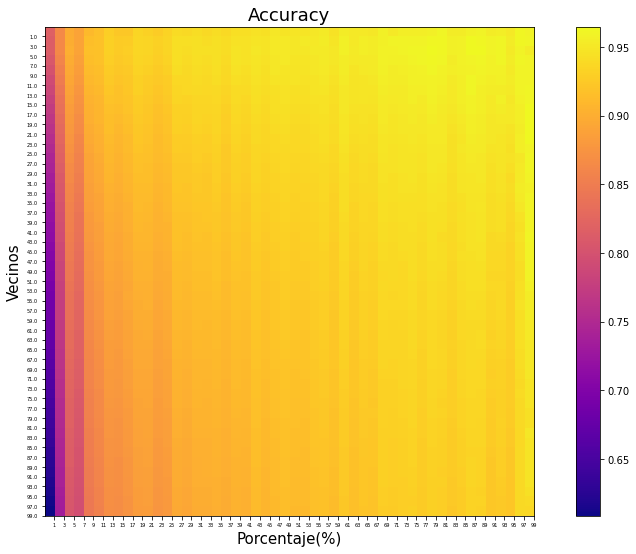

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lee contenido csv
csv_name = "accuracy.csv" # csv file name
# crea un dataframe (df) a partir del archivo
# el csv accuracy.csv esta separa por espacios => sep = " "
df = pd.read_csv(csv_name, sep = " ", dtype = float)

# Transformo a numpy arrays
# arreglo de arreglos numpy 
# con mismo orden que el contenido del csv
# sin indice de columna o fila
np_matrix = df.iloc[:,1:].to_numpy()
# nombres de filas (indices)
yticks = df["Vecinos vs porcentaje"].to_numpy()
# nombres de columnas
xticks = df.columns[1:].to_numpy()

plt.figure(figsize = (15,9))

plt.imshow(np_matrix, cmap = "plasma")
plt.colorbar()
plt.yticks(ticks = np.arange(len(yticks))+0.5, 
	       labels = list(map(lambda x: str(x), yticks)),
	       fontsize = 5)
plt.xticks(ticks = np.arange(len(xticks))+0.5, 
	       labels = list(map(lambda x: str(x), xticks)),
	       fontsize = 5)
plt.title("Accuracy", 
	      fontsize = 18)
plt.ylabel("Vecinos", fontsize = 15)
plt.xlabel("Porcentaje(%)", fontsize = 15)
plt.show()
